## 正态分布检验
#### Jarque-Bera检验($n>30$)
- 在统计学中，Jarque–Bera检验是对样本数据是否具有符合正态分布的偏度(skewness)和峰度(kurtosis)的拟合优度的检验.
- JB检验的统计量定义为:
$$JB={\frac {S^{2}}{6/n}}+{\frac {(K-3)^{2}}{24/n}}$$
- 其中：
$$n\text{表示样本数量}$$
$$\text{偏度}S=\frac{\hat{\mu}_3}{\hat{\sigma}^3}=\frac{\frac{1}{n} \sum^n_{i=1}(x_i-\bar{x})^3}{(\frac{1}{n}\sum^n_{i=1}(x_i-\bar{x})^2)^{\frac{3}{2}}}$$
$$\text{峰度}K=\frac{\hat{\mu}_4}{\hat{\sigma}^4}=\frac{\frac{1}{n} \sum^n_{i=1}(x_i-\bar{x})^4}{(\frac{1}{n}\sum^n_{i=1}(x_i-\bar{x})^2)^2}$$
- 若数据采样于正态分布的总体，则JB检验渐进于$χ^2$分布，偏度为0且超额峰度为0。

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from scipy import stats
import numpy as np
import pandas as pd

In [12]:
data = pd.read_excel('eighth_girl.xlsx')

In [13]:
x = stats.norm.rvs(2, 3, 10000)    
skewness = stats.skew(x)  # 偏度
kurtosis = stats.kurtosis(x)  # 峰度
jbtext = stats.jarque_bera(x)
print('偏度为：',skewness)
print('峰度为：',kurtosis)
print('J-B值：',jbtext[0])
print('p-value:',jbtext[1])

偏度为： -0.023830406806464765
峰度为： -0.04187704723369379
J-B值： 1.677183433024814
p-value: 0.43231892252929705


In [14]:
def my_jbtest(x, a=0.05):
    col_name = x.columns
    col_cnt = x.shape[1]
    h_mat = np.zeros(col_cnt)
    p_mat = np.zeros(col_cnt)
    for i in range(col_cnt):
        p_val = stats.jarque_bera(data[col_name[i]])[1]
        p_mat[i] = p_val
        if p_val >= a:
            h_mat[i] = 0  # 通过原假设
        else:
            h_mat[i] = 1  # 拒绝原假设
    df = pd.DataFrame([p_mat, h_mat], columns=col_name, index=['p_value', 'H'])
    return df

In [15]:
df = my_jbtest(data, 0.01)
df

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
p_value,0.006021,5.644185e-225,0.00853,5.652357e-12,1.904247e-173,0.039499
H,1.000000,1.000000e+00,1.00000,1.000000e+00,1.000000e+00,0.000000


#### Shapiro-Wilk检验($3\leq n\leq 50$)
- The Shapiro–Wilk test is a test of normality published in 1965 by Samuel Sanford Shapiro and Martin Wilk.
- Shapiro-Wilk 检验检验样本$x_1, x_2, \dots, x_n$来自正态分布总体的零假设。检验统计量为：
$$W=\frac{(\sum^n_{i=1}a_i x_{(i)})^2}{\sum^n_{i=1}(x_i-\bar{x})^2}$$


In [16]:
import matplotlib.pyplot as plt

In [17]:
stats.shapiro(data['身高'])

ShapiroResult(statistic=0.9839143617748761, pvalue=4.202342215738349e-06)

In [18]:
def my_shaptext(x,a=0.05):
    col_name = x.columns.values
    col_cnt = x.shape[1]
    h_mat = np.zeros(col_cnt)
    p_mat = np.zeros(col_cnt)
    for i in range(col_cnt):
        p_val = stats.shapiro(data[col_name[i]])[1]
        p_mat[i] = p_val
        if p_val >= a:
            h_mat[i] = 0  # 通过原假设
        else:
            h_mat[i] = 1  # 拒绝原假设
#     print(h_mat)
#     print(p_mat)
    df = pd.DataFrame([p_mat,h_mat], columns=col_name, index=['p_value','H'])
    return df

In [19]:
my_shaptext(data)

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
p_value,0.000004,2.493826e-18,0.000002,6.099665e-12,4.980987e-14,0.000058
H,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000


#### Q-Q图(大样本)

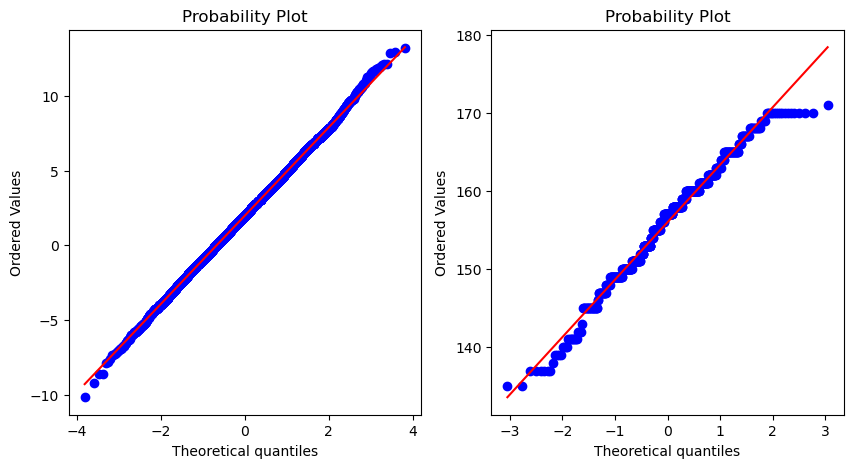

In [20]:
x = stats.norm.rvs(2, 3, 10000)

fig = plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
stats.probplot(x, dist="norm", plot=plt)

fig.add_subplot(1,2,2)
stats.probplot(data['身高'], dist="norm", plot=plt)

plt.show()

#### Spearman Correlation
- 对于样本容量为$n$的样本，将$n$个原始数据$X_i,Y_i$转换成等级数据$R(X_i),R(Y_i)$，则相关系数$r_s$为：
$$r_s=\rho _{R(X),R(Y)}=\frac{cov(R(X),R(Y))}{\sigma _{R(X)}\sigma _{R(Y)}}=\frac{\sum^n_{i=1} (R(X_i)-\bar{R}(X))(R(Y_i)-\bar{R}(Y))}{\sqrt{\sum^n_{i=1} (R(X_i)-\bar{R}(X))^2\sum^n_{i=1} (R(Y_i)-\bar{R}(Y))^2}}$$
- 当所有等级数值都为整数(原数据中没有相同值)时，可以通过以下简单的步骤计算等级相关系数：
- $$r_s=1-\frac{6\sum^n_{i=1}d^2_i}{n(n^2-1)}$$
    - 其中$d_i=R(X_i)-R(Y_i)$
- 如果当$X$增加时，$Y$趋向于增加，则斯皮尔曼相关系数为正；如果当$X$增加时，$Y$趋向于减少，则斯皮尔曼相关系数为负。
- 斯皮尔曼相关系数为$0$表明当$X$增加时$Y$没有任何趋向性。当$X$和$Y$越来越接近完全的单调相关时，斯皮尔曼相关系数会在绝对值上增加。
- 当$X$和$Y$完全单调相关时，斯皮尔曼相关系数的绝对值为$1$。

In [22]:
data.corr(method='spearman')

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,1.000000,0.030134,-0.243004,-0.199045,0.062436,0.109855
体重,0.030134,1.000000,0.130468,0.089845,0.021638,-0.048798
肺活量,-0.243004,0.130468,1.000000,0.262607,0.021946,-0.080075
50米跑,-0.199045,0.089845,0.262607,1.000000,-0.090988,-0.002918
立定跳远,0.062436,0.021638,0.021946,-0.090988,1.000000,-0.039892
坐位体前屈,0.109855,-0.048798,-0.080075,-0.002918,-0.039892,1.000000


斯皮尔曼相关系数的假设检验

In [23]:
# 自定义求解p值矩阵的函数
def my_pvalue_spearman(x):
    col = x.shape[1]
    col_name = x.columns.values
    p_val = []
    for i in range(col):
        for j in range(col):
            p_val.append(stats.spearmanr(x[col_name[i]], x[col_name[j]])[1])
    p_val = pd.DataFrame(np.array(p_val).reshape(col, col), columns=col_name, index=col_name)
    p_val.to_csv('p_val_spearman.csv')
    p_val = pd.read_csv('p_val_spearman.csv', index_col=0)
    return p_val

In [24]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [25]:
sp_result = my_pvalue_spearman(data)
sp_result

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,0.000,0.465,0.000,0.000,0.129,0.008
体重,0.465,0.000,0.001,0.029,0.600,0.236
肺活量,0.000,0.001,0.000,0.000,0.594,0.052
50米跑,0.000,0.029,0.000,0.000,0.027,0.944
立定跳远,0.129,0.600,0.594,0.027,0.000,0.333
坐位体前屈,0.008,0.236,0.052,0.944,0.333,0.000


In [26]:
def append_sign(x):
    temp = str(round(x,3))
    if x < 0.01:
        return temp + '**'
    elif 0.01 <= x < 0.05:
        return temp + '*'
    else:
        return temp

In [29]:
row = sp_result.shape[1]
sp_signed = sp_result.copy()
for r in range(row):
    sp_signed.iloc[:,r] = sp_result.iloc[:,r].apply(append_sign)
    
sp_signed

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,0.0**,0.465,0.0**,0.0**,0.129,0.008**
体重,0.465,0.0**,0.001**,0.029*,0.6,0.236
肺活量,0.0**,0.001**,0.0**,0.0**,0.594,0.052
50米跑,0.0**,0.029*,0.0**,0.0**,0.027*,0.944
立定跳远,0.129,0.6,0.594,0.027*,0.0**,0.333
坐位体前屈,0.008**,0.236,0.052,0.944,0.333,0.0**


斯皮尔曼相关系数和皮尔逊相关系数的选择：

1. 连续数据，正态分布，线性关系，用Pearson相关系数是最恰当，当然用Spearman相关系数也可以，就是效率没有Pearson相关系数高。

2. 上述任一条件不满足，就用Spearman相关系数，不能用Pearson相关系数。

3. 两个定序数据之间也用Spearman相关系数，不能用Pearson相关系数。